# What Makes a Tip Higher?
#### Brandon Shellenberger
#### Feburary 9th, 2024

These are the two questions I will be answering about the data set:
1. Do people tip more by percent when the bill is higher?
2. Which time has the highest tip by percent?
3. Who is the overall best tipper?

In [97]:
# Importing External Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# Basic Description of data
df = sns.load_dataset("tips")
print(df.head(10))
print(f"Dimensions: {df.shape}")
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
Dimensions: (244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [99]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


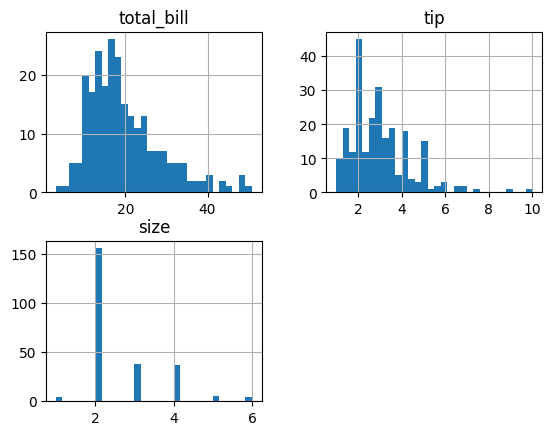

In [100]:
df.hist(bins=30)
plt.show()

### Numerical Columns Observations
Looking at the numerical columns, most of the total bills and tips are on the lower end of the spectrum and slowly tapers off as the values increase. As for the size column, there are going to be a lot of 2 member parties with a some 3 and 4 member parties, and minimal number os 1, 5, and 6 member parties.

sex
Male      157
Female     87
Name: count, dtype: int64


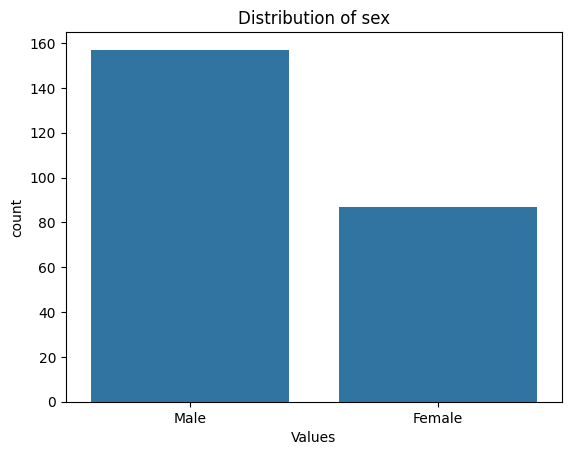

smoker
No     151
Yes     93
Name: count, dtype: int64


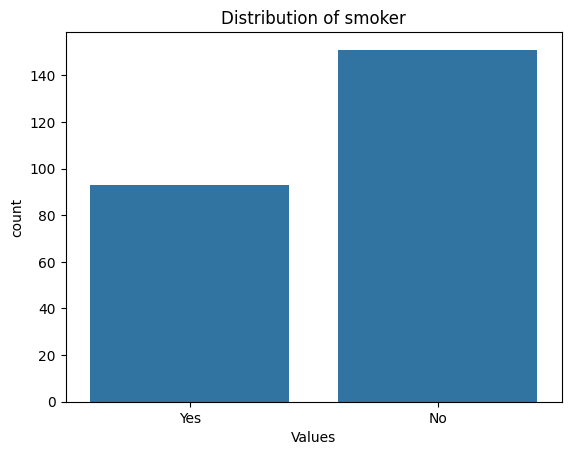

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


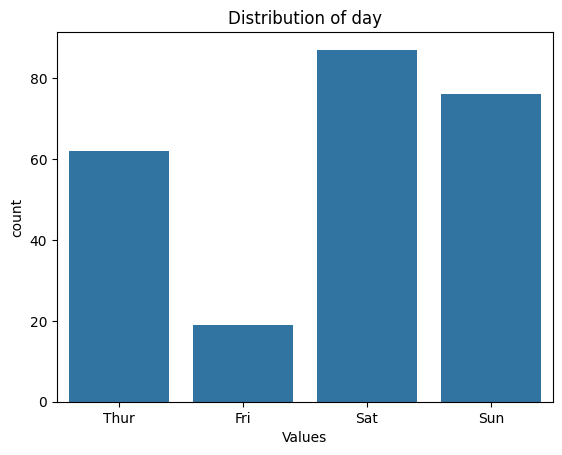

time
Dinner    176
Lunch      68
Name: count, dtype: int64


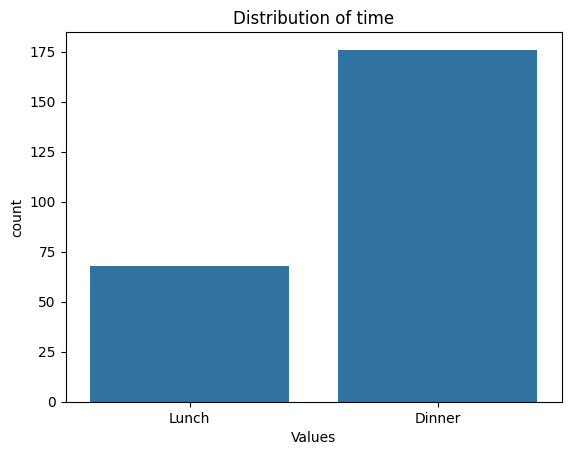

In [101]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Inspect value counts by categorical column
    print(df[col].value_counts())
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.xlabel("Values")
    plt.title(f'Distribution of {col}')
    plt.show()

### Categorical Columns Observations
I am going to break this up into the different columns.
1. Mostly males are tipping in this dataset.
2. Most the dataset recorded non-smokers.
3. Surpisingly there are only a few data points recorded for Friday.
4. Most of the records are at dinner time.

In [102]:
df.rename(columns=
          {'total_bill': 'Total Bill',
           'time': 'Meal'},
          inplace=True)

df['tip_percent'] = round((df['tip']/df['Total Bill']) * 100, 2)
print(df.head(10))

   Total Bill   tip     sex smoker  day    Meal  size  tip_percent
0       16.99  1.01  Female     No  Sun  Dinner     2         5.94
1       10.34  1.66    Male     No  Sun  Dinner     3        16.05
2       21.01  3.50    Male     No  Sun  Dinner     3        16.66
3       23.68  3.31    Male     No  Sun  Dinner     2        13.98
4       24.59  3.61  Female     No  Sun  Dinner     4        14.68
5       25.29  4.71    Male     No  Sun  Dinner     4        18.62
6        8.77  2.00    Male     No  Sun  Dinner     2        22.81
7       26.88  3.12    Male     No  Sun  Dinner     4        11.61
8       15.04  1.96    Male     No  Sun  Dinner     2        13.03
9       14.78  3.23    Male     No  Sun  Dinner     2        21.85


## Initial Visualizations
In the section, I will begin to answer the different questions as stated in the beginning.

1. Do people tip more by percent when the bill is higher?

I am going to show this relation with a scatter plot.

<Axes: xlabel='Total Bill', ylabel='tip_percent'>

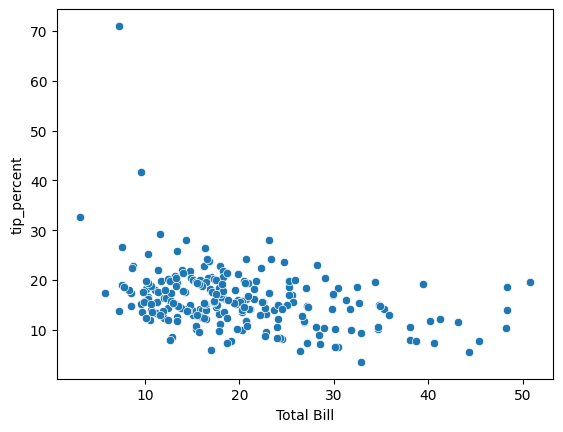

In [104]:
sns.scatterplot(data=df, x='Total Bill', y='tip_percent')

Looking at the scatter plot, it seems like the percent of the tip does not depend on how much the bill was.

2. Who tips the highest?

In this section, I will show who the most likely person to tip the highest amount based on the tip percentage. I will be using a box plot.

<Axes: xlabel='sex', ylabel='tip_percent'>

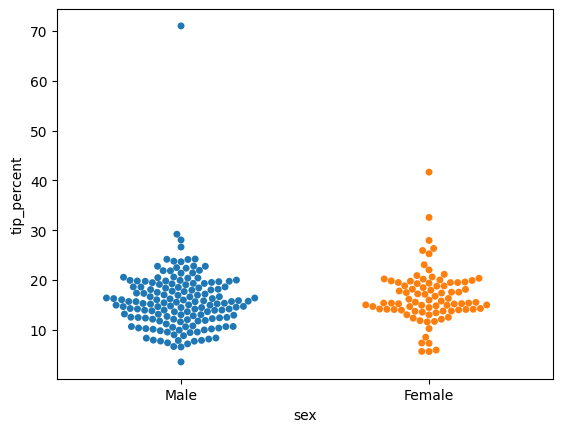

In [111]:
sns.swarmplot(data=df, x='sex', y='tip_percent', hue='sex')

<Axes: xlabel='smoker', ylabel='tip_percent'>

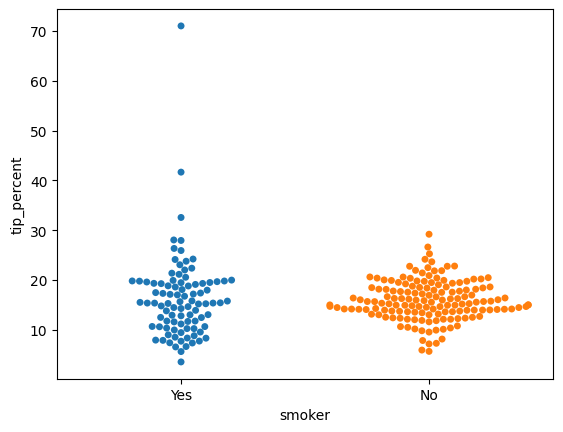

In [112]:
sns.swarmplot(data=df, x='smoker', y='tip_percent', hue='smoker')